# Regression and Interpolation - Machine Problem 2
In this machine problem, you are going to develop your own functions for regression and interpolation. The goal is to learn how to set up matrices and to perform basic matrix operations. 

### TASK 1. 
Import the data files "current.txt" and "normal.txt" and determine their fitting coefficients using Python's built-in function from Exercise 3. Use the variables $Bc$ and $Bn$ for the fitting coefficients of the $current$ and $normal$ data sets, respectively. Solve for their corresponding fitting functions and assign them to the variables $Ic$ and $Fn$, respectively. Solve for the error between the fitting functions and the data set and assign the results to the variables $ec$ and $en$, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import CubicSpline

A1 = np.loadtxt('current.txt', delimiter = ',',skiprows=1)
tc = A1[:,0]
ic = A1[:,1]
A2 = np.loadtxt('normal.txt')
tn = A2[15:50,0]
fn = A2[15:50,1]

m = 1
Bc = np.polyfit(tc,ic,m)
sumc = np.zeros(len(tc))
for i in range(m+1):
    sumc += Bc[i]*tc**(m-i)
Ic = sumc

Bn = np.polyfit(tn,fn,m)
sumn = np.zeros(len(tn))
for i in range(m+1):
    sumn += Bn[i]*tn**(m-i)
Fn = sumn

ec = np.sqrt(sum((Ic-ic)**2)/(len(ic)-(m+1)))
en = np.sqrt(sum((Fn-fn)**2)/(len(fn)-(m+1)))

### TASK 2. Set-up the polynomial regression matrix
As you've seen in the video, in order to find the coefficients, $B(i)$, you will need to set up the polynomial regression matrix, as shown. Let<br><br>
\begin{equation*}
A = 
\begin{pmatrix}
n & \displaystyle\sum_{i=1}^n x_i & \displaystyle\sum_{i=1}^n x_i^2 & \cdots & \displaystyle\sum_{i=1}^n x_i^m \\
\displaystyle\sum_{i=1}^n x_i & \displaystyle\sum_{i=1}^n x_i^2 & \displaystyle\sum_{i=1}^n x_i^3 & \cdots & \displaystyle\sum_{i=1}^n x_i^{m+1} \\
\displaystyle\sum_{i=1}^n x_i^2 & \displaystyle\sum_{i=1}^n x_i^3 & \displaystyle\sum_{i=1}^n x_i^4 & \cdots & \displaystyle\sum_{i=1}^n x_i^{m+2} \\
\vdots  & \vdots  & \vdots & \ddots & \vdots  \\
\displaystyle\sum_{i=1}^n x_i^m & \displaystyle\sum_{i=1}^n x_i^{m+1} & \displaystyle\sum_{i=1}^n x_i^{m+2} & \cdots & \displaystyle\sum_{i=1}^n x_i^{2m} 
\end{pmatrix}
\end{equation*}
<br><br>where $n$ is the number of data points and $m$ is the highest order of the polynomial as shown<br><br>
$yfit = B(0)t^m + B(1)t^{m-1} + B(2)t^{m-2} + ... + B(m)$.
<br><br>We define the column matrix
\begin{equation*}
B = 
\begin{pmatrix}
B(0) \\
B(1) \\
B(2) \\
\vdots \\
B(m) 
\end{pmatrix}
\end{equation*}
<br><br>to be the coefficients of the polynomial fit equation, $yfit$. Finally, we define the column matrix<br><br>
\begin{equation*}
C = 
\begin{pmatrix}
\displaystyle\sum_{i=1}^n y_i \\
\displaystyle\sum_{i=1}^n x_iy_i \\
\displaystyle\sum_{i=1}^n x_i^2y_i \\
\vdots \\
\displaystyle\sum_{i=1}^n x_i^my_i
\end{pmatrix}
\end{equation*}
<br><br>such that the product of the matricces $A$ and $B$ is equal to matrix $C$, i.e.<br><br>
$A$ $B$ = $C$.
<br><br>This derivation has been shown in the video lecture. To get the coefficients, you should solve for<br><br>
$B$ = $A^{-1}$ $C$.
<br><br>NOTE: All the summation notations written above begin with $i=1$. Keep in mind though that Python indices start from $i=0$.<br>
The first thing you need to do is set up the matrix $A$. Remember that the matrix $A$ has elements<br><br>
\begin{equation*}
A = 
\begin{pmatrix}
A(1,1) & A(1,2) & A(1,3) & \cdots & A(1,4) \\
A(2,1) & A(2,2) & A(2,3) & \cdots & A(2,4) \\
A(3,1) & A(3,2) & A(3,3) & \cdots & A(3,4) \\
\vdots  & \vdots  & \vdots & \ddots & \vdots  \\
A(m+1,1) & A(m+1,2) & A(m+1,3) & \cdots & A(m+1,4) 
\end{pmatrix}
\end{equation*}
<br><br>NOTE: I've kept this index notation to indicate the correct row and column elements, e.g., A(3,2) is the 3rd row and 2nd column element of matrix $A$. Again, keep in mind when implementing this that Python indices start from $i=0$.<br>
Figure out how to equate each elements of the matrix  at the very top of this thread with each element of the matrix $A$ just above this paragraph. You need only one line of code to solve for  in terms of the elements in summation, and two $for$ loops. Set up matrix $A$ in Cell 1 below corresponding to the $current$ data, and use the variable $Ac$ for matrix $A$.

In [2]:
# Cell 1
Ac = np.zeros((m+1,m+1))
for i in range(m+1):
    for j in range(m+1):
        Ac[i,j] = sum( tc**(i+j) )

print(Ac)

[[101.        5.05   ]
 [  5.05      0.33835]]


Similarly, we can equate<br><br>
\begin{equation*}
C = 
\begin{pmatrix}
\displaystyle\sum_{i=1}^n y_i \\
\displaystyle\sum_{i=1}^n x_iy_i \\
\displaystyle\sum_{i=1}^n x_i^2y_i \\
\vdots \\
\displaystyle\sum_{i=1}^n x_i^my_i
\end{pmatrix}
=
\begin{pmatrix}
C(1,1) \\
C(2,1) \\
C(3,1) \\
\vdots \\
C(m+1,1)
\end{pmatrix}
\end{equation*}
<br><br>
In Cell 2 below, set up matrix  corresponding to the $current$ data, and use the variables $Cc$ for matrix $C$. Only one line of code inside one for loop is needed.

In [3]:
# Cell 2
Cc = np.zeros(m+1)
for i in range(m+1):
    Cc[i] = sum( ic*(tc**(i)) )

print(Cc)

[6.30768991 0.10308572]


Solve for the coefficients, B(i), in Cell 3 below corresponding to the $current$ data, and use the variables $Bcmy$ for the matrix $B$. Only one line of code is needed. Compare $Bc$ and $Bcmy$, and take note of the order. 

In [25]:
# Cell 3
print(Bc)
Bcmy = np.linalg.inv(Ac).dot(Cc)
print(Bcmy)

[ 4.01746959e+04 -1.00481486e+04  8.97521072e+02 -3.38714367e+01
  4.70926553e-01]
[ 4.70926553e-01 -3.38714367e+01  8.97521072e+02 -1.00481486e+04
  4.01746959e+04]


Using the x-data set for current, $tc$, generate a new set of current values from the coefficients obtained from the variable $Bcmy$ in Cell 4. Assign these new data set to the variable $Icmy$.

In [5]:
# Cell 4
sumc = np.zeros(len(tc+1))
for i in range(m+1):
    sumc += Bcmy[i]*tc**i
Icmy = sumc

Plot the best fit line, $(tc,Ic)$, obtained from the Python built-in function, the best fit line, $(tc,Icmy)$ you just computed, and compare them in the same plot with the original current data, $(tc,ic)$. Use the same black circles for $(tc,ic)$, a red solid line for $(tc,Ic)$, and a blue dashed line for $(tc,Icmy)$, with LineWidths of 3 units, for the best fit lines. Add a title and the axes labels.

Text(0, 0.5, 'Current (A)')

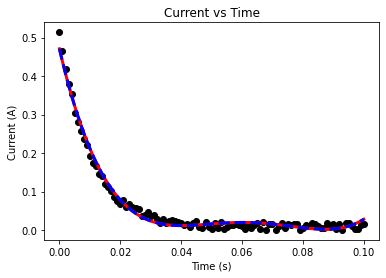

In [6]:
plt.plot(tc,ic,'ko')
plt.plot(tc,Ic,'r',linewidth=3)
plt.plot(tc,Icmy,'b--',linewidth=3)
plt.title("Current vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")

Using the algorithm you just developed from Cells 1 to 4, write a Python function named $regre$ with input variables $(x,y,m)$ where $x$ and $y$ are the data set and $m$ is the degree of the polynomial. Using your Python function on the $normal$ data, solve for the regression coefficients and assign them to the variable $Bnmy$. Display the values of the coefficients.

In [7]:
# Cell 5
def regre(x,y,m):
    A = np.zeros((m+1,m+1))
    for i in range(m+1):
        for j in range(m+1):
            A[i,j] = sum( x**(i+j) )
    C = np.zeros(m+1)
    for i in range(m+1):
        C[i] = sum( y*(x**i) )
    B = np.linalg.inv(A).dot(C)
    return B

Bnmy = regre(tn,fn,m)
print(Bn)
print(Bnmy)    

[  -37.85541054   513.73680456 -2485.87486503  5027.54375768
 -3588.36898464]
[-3588.36898326  5027.5437557  -2485.87486402   513.73680434
   -37.85541052]


Using the x-data set for normal, $tn$, generate the fitting curve for the normal data set from the coefficients obtained from the variable $Bnmy$ in Cell 5. Assign these new data set to the variable $Fnmy$.

In [8]:
# Cell 6
sumn = np.zeros(len(tn+1))
for i in range(m+1):
    sumn += Bnmy[i]*tn**i
Fnmy = sumn

Plot the best fit line, $(tn,Fn)$, obtained from the Python built-in function, the best fit line, $(tn,Fnmy)$ you just computed, and compare them in the same plot with the original normal data, $(tn,fn)$. Use the same black circles for $(tc,fn)$, a red solid line for $(tc,Fn)$, and a blue dashed line for $(tc,Fnmy)$, with LineWidths of 3 units, for the best fit lines. Add a title and the axes labels.

Text(0, 0.5, 'Normal Force (N)')

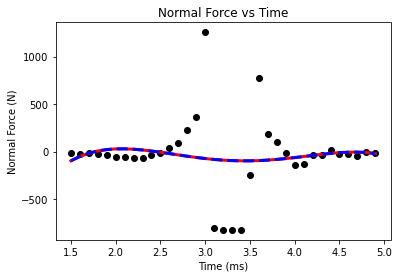

In [9]:
plt.plot(tn,fn,'ko')
plt.plot(tn,Fn,'r',linewidth=3)
plt.plot(tn,Fnmy,'b--',linewidth=3)
plt.title("Normal Force vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Normal Force (N)")

Solve for the error corresponding to $(tc,Icmy)$ and $(tn,Inmy)$. Assign the variables $ecmy$ and $enmy$ to the errors from the $current$ data set and the  data set, respectively. Compare these and $ec$ and $en$.

In [10]:
print(ec)
ecmy = np.sqrt( sum( (Icmy-ic)**2/(len(ic+1)-(m+1)) ))
print(ecmy)
print(en)
enmy = np.sqrt( sum( (Fnmy-fn)**2/(len(fn+1)-(m+1)) ))
print(enmy)

0.011806424489534789
0.011806424489534803
413.061204109386
413.06120410938604


### TASK 3. Set-up the cubic interpolation matrix


As in the previous task, using the same data sets, we are now going to develop an algorithm for spline interpolation and make our own spline function.<br><br>
First, we need to define a new set of data points with respect to the x-axis variable that have more data points in between. We use the same variables, $tcq$ and $tnq$, as our query points. Using Python's built-in $CubicSpline()$ function, generate the new values for the $current$ and $normal$ data and assign these new values to the variables, $Iscpline$ and $Fnspline$. Add new 5 data points in between the existing data points.

In [11]:
q = 5
tcq = np.linspace(np.min(tc),np.max(tc), len(tc) + (len(tc)-1)*q)
tnq = np.linspace(np.min(tn),np.max(tn), len(tn) + (len(tn)-1)*q)
f = CubicSpline(tc,ic, bc_type = 'natural')
Icspline = f(tcq)
f = CubicSpline(tn,fn, bc_type = 'natural')
Fnspline = f(tnq)

It's time to make our own spline interpolation function based on the video lecture. We are going to use cubic splines, and thus will be naming our function $cubint()$. As in the $CubicSpline()$ function, the first two arguments in the function are the x- and y-data sets, while the third argument is the query points. We beging by first studying this equation.<br><br>
$(x_i-x_{i-1}) f"(x_{i-1}) + 2 (x_{i+1}-x_{i-1}) f"(x_{i}) + (x_{i+1}-x_i) f"(x_{i+1}) = \frac{6}{x_{i+1}-x_i} [f(x_{i+1})-f(x_i)] + \frac{6}{x_i-x_{i-1}} [f(x_{i-1})-f(x_i)]$
<br><br>The goal is to solve for the values of the second derivatives at the interior knots. If we have $n$ data points, then there are $n-2$ unknowns. So, we need to set up $n-2$ simultaneous equations. However, we will be setting up an $nxn$ matrix first. What are the elements of this matrix. The first row elements are obtained from $i=1$. Using the above equation, we get<br><br>
$(x_1-x_0) f"(x_0) + 2 (x_2-x_0) f"(x_1) + (x_2-x_1) f"(x_2) = \frac{6}{x_2-x_1} [f(x_2)-f(x_1)] + \frac{6}{x_1-x_0} [f(x_0)-f(x_1)]$
<br><br>
The second row elements are obtained from $i=2$, which yields<br><br>
$(x_2-x_1) f"(x_1) + 2 (x_3-x_1) f"(x_2) + (x_3-x_2) f"(x_3) = \frac{6}{x_3-x_2} [f(x_3)-f(x_2)] + \frac{6}{x_2-x_1} [f(x_1)-f(x_2)]$
<br><br>For $i=3$, we get<br><br>
$(x_4-x_3) f"(x_3) + 2 (x_5-x_3) f"(x_3) + (x_5-x_4) f"(x_5) = \frac{6}{x_5-x_4} [f(x_5)-f(x_4)] + \frac{6}{x_4-x_3} [f(x_3)-f(x_5)]$
<br><br>
This goes on until $i=n-2$, which we then obtain<br><br>
$(x_{n-2}-x_{n-3}) f"(x_{n-3}) + 2 (x_{n-1}-x_{n-3}) f"(x_{n-2}) + (x_{n-1}-x_{n-2}) f"(x_{n-1}) = \frac{6}{x_{n-1}-x_{n-2}} [f(x_{n-1})-f(x_{n-2})] + \frac{6}{x_{n-2}-x_{n-3}} [f(x_{n-3})-f(x_{n-2})]$
<br><br>We can rewrite these equations in matrix form to be<br><br>
\begin{equation*}
\begin{pmatrix}
x_1-x_0 & 2 (x_2-x_0) & x_2-x_1 & 0 & 0 & 0 & 0 & \cdots & 0 \\
0 & x_2-x_1 & 2 (x_3-x_1) & x_3-x_2 & 0 & 0 & 0 & \cdots & 0 \\
0 & 0 & x_3-x_2 & 2 (x_4-x_2) & x_4-x_3 & 0 & 0 & \cdots & 0 \\
\vdots  & \vdots  & \vdots & \vdots  & \vdots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & 0 & 0 & 0 & x_{n-2}-x_{n-3} & 2 (x_{n-1}-x_{n-3}) & x_{n-1}-x_{n-2} 
\end{pmatrix}
\begin{pmatrix}
f"(x_0) \\
f"(x_1) \\
f"(x_2) \\
\vdots \\
f"(x_{n-1})  
\end{pmatrix} 
\end{equation*}<br>
\begin{equation*}
=\begin{pmatrix}
\frac{6}{x_2-x_1} [f(x_2)-f(x_1)] + \frac{6}{x_1-x_0} [f(x_0)-f(x_1)] \\
\frac{6}{x_3-x_2} [f(x_3)-f(x_2)] + \frac{6}{x_2-x_1} [f(x_1)-f(x_2)] \\
\frac{6}{x_4-x_3} [f(x_4)-f(x_3)] + \frac{6}{x_3-x_2} [f(x_2)-f(x_3)] \\
\vdots \\
\frac{6}{x_{n-1}-x_{n-2}} [f(x_{n-1})-f(x_{n-2})] + \frac{6}{x_{n-2}-x_{n-3}} [f(x_{n-3})-f(x_{n-1})]  
\end{pmatrix}  
\end{equation*}
<br><br>If we let
\begin{equation*}
A = 
\begin{pmatrix}
x_1-x_0 & 2 (x_2-x_0) & x_2-x_1 & 0 & 0 & 0 & 0 & \cdots & 0 \\
0 & x_2-x_1 & 2 (x_3-x_1) & x_3-x_2 & 0 & 0 & 0 & \cdots & 0 \\
0 & 0 & x_3-x_2 & 2 (x_4-x_2) & x_4-x_3 & 0 & 0 & \cdots & 0 \\
\vdots  & \vdots  & \vdots & \vdots  & \vdots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & 0 & 0 & 0 & x_{n-2}-x_{n-3} & 2 (x_{n-1}-x_{n-3}) & x_{n-1}-x_{n-2} 
\end{pmatrix}
\end{equation*}<br>
\begin{equation*}
B = 
\begin{pmatrix}
f"(x_0) \\
f"(x_1) \\
f"(x_2) \\
\vdots \\
f"(x_{n-1})  
\end{pmatrix} 
\end{equation*}
<br>and<br>
\begin{equation*}
C =\begin{pmatrix}
\frac{6}{x_2-x_1} [f(x_2)-f(x_1)] + \frac{6}{x_1-x_0} [f(x_0)-f(x_1)] \\
\frac{6}{x_3-x_2} [f(x_3)-f(x_2)] + \frac{6}{x_2-x_1} [f(x_1)-f(x_2)] \\
\frac{6}{x_4-x_3} [f(x_4)-f(x_3)] + \frac{6}{x_3-x_2} [f(x_2)-f(x_3)] \\
\vdots \\
\frac{6}{x_{n-1}-x_{n-2}} [f(x_{n-1})-f(x_{n-2})] + \frac{6}{x_{n-2}-x_{n-3}} [f(x_{n-3})-f(x_{n-1})]  
\end{pmatrix} 
\end{equation*}
<br><br>then in order to solve for $B$, we need to solve for<br><br>
$B = A^{-1} C$
<br><br>Keep in mind that the boundary conditions dictate that $f"(x_0) = f"(x_{n-1}) = 0$.<br><br>In Cell 7 below, set up matrices $A$ and $C$ simultaneously in one $for$ loop for the $current$ data set.

In [12]:
# Cell 7
n = len(tc)
Adum = np.zeros((n-2,n))
C = np.zeros(n-2)
for i in range(1,n-1):
    # Matrix A
    Adum[i-1,i-1] = tc[i] - tc[i-1]
    Adum[i-1,i] = 2*( tc[i+1]-tc[i-1] )
    Adum[i-1,i+1] = tc[i+1]-tc[i]
    # Matrix C
    e1 = ( 6/(tc[i+1]-tc[i]) )*(ic[i+1]-ic[i])
    e2 = ( 6/(tc[i]-tc[i-1]) )*(ic[i-1]-ic[i])
    C[i-1] = e1+e2
A = Adum[:,1:n-1]
print(A)

[[0.004 0.001 0.    ... 0.    0.    0.   ]
 [0.001 0.004 0.001 ... 0.    0.    0.   ]
 [0.    0.001 0.004 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.004 0.001 0.   ]
 [0.    0.    0.    ... 0.001 0.004 0.001]
 [0.    0.    0.    ... 0.    0.001 0.004]]


In Cell 8 below, solve for the matrix $B$ for the $current$ data set.

In [13]:
# Cell 8
Bdum = np.linalg.inv(A).dot(C)
B = np.zeros(n)
B[1:n-1] = Bdum

The next step would be to solve for the best fit line using this equation<br><br>
$f_i(x) = \frac{f"(x_{i-1})}{6(x_i-x_{i-1})} (x_i-x)^3 + \frac{f"(x_i)}{6(x_i-x_{i-1})} (x-x_{i-1})^3 + [\frac{f(x_{i-1})}{x_i-x_{i-1}}-\frac{f"(x_{i-1})(x_i-x_{i-1})}{6}](x_i-x) + [\frac{f(x_i)}{x_i-x_{i-1}}-\frac{f"(x_i)(x_i-x_{i-1})}{6}](x-x_{i-1})$
<br><br>where $x$ are your query points. We start with $i=1$ and work our way up to $i=n-1$. To solve for $f_i(x)$, the query points must be $x_{i-1}\le x<x_i$. 
<br><br>In Field 9, solve for the best fit line for the $current$ data assigning it to the variable, $Icmyspline$.

In [14]:
# Cell 9
Icmyspline = np.zeros(np.size(tcq,0))
k = 0
for i in range(1,len(tc)):
    while ( tcq[k] < tc[i] ):
        den = tc[i]-tc[i-1]
        term1 = ( B[i-1]/(6*den) )*( tc[i] - tcq[k] )**3;
        term2 = ( B[i]/(6*den) )*( tcq[k] - tc[i-1] )**3;
        term3 = ( ic[i-1]/den - B[i-1]*den/6 )*( tc[i] - tcq[k] );
        term4 = ( ic[i]/den - B[i]*den/6 )*( tcq[k] - tc[i-1] );
        Icmyspline[k] = term1 + term2 + term3 + term4;
        k += 1

Plot the best fit line, $(tcq,Icspline)$ obtained from the Python built-in function, the best fit line, $(tcq,Icmyspline)$ you just computed, and compare it in the same plot with the original current data, $(tc,ic)$. Use the same black circles for the $current$ data and a red line, with a linewidth of 3 units, for the best fit line. Use the same black circles for $(tc,ic)$, a red solid line for $(tcq,Icspline)$, and a blue dashed line for $(tcq,Icmyspline)$, with linewidths of 3 units, for the best fit lines. Add a title and the axes labels.

Text(0, 0.5, 'Current (A)')

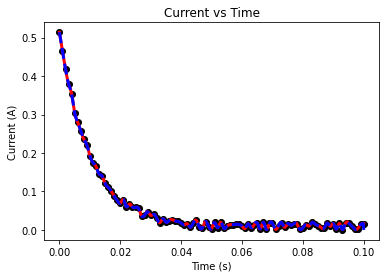

In [15]:
plt.plot(tc,ic,'ko')
plt.plot(tcq,Icspline,'r',linewidth=3)
plt.plot(tcq,Icmyspline,'b--',linewidth=3)
plt.title("Current vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")

Using the algorithm you just developed from Cells 7 to 9, write a Python function, in Cell 10 below, named $mycubicspline()$ with input variables $(x,y,qx)$ where $x$ and $Y$ are the data set and $qx$ is set of querypoints. The output of the function is the best fit line $qy$. Use your Python function to generate the new interpolating function,$Fnmyspline$, for the $normal$ data set.

In [16]:
# Cell 10
def mycubicspline(x,y,qx):
    n = len(x)
    Adum = np.zeros((n-2,n))
    C = np.zeros(n-2)
    for i in range(1,n-1):
        # Matrix A
        Adum[i-1,i-1] = x[i] - x[i-1]
        Adum[i-1,i] = 2*( x[i+1]-x[i-1] )
        Adum[i-1,i+1] = x[i+1]-x[i]
        # Matrix C
        e1 = ( 6/(x[i+1]-x[i]) )*(y[i+1]-y[i])
        e2 = ( 6/(x[i]-x[i-1]) )*(y[i-1]-y[i])
        C[i-1] = e1+e2
        A = Adum[:,1:n-1]
        
    Bdum = np.linalg.inv(A).dot(C)
    B = np.zeros(n)
    B[1:n-1] = Bdum
    
    qy = np.zeros(np.size(qx))
    k = 0
    for i in range(1,len(x)):
        while ( qx[k] < x[i] ):
            den = x[i]-x[i-1]
            term1 = ( B[i-1]/(6*den) )*( x[i] - qx[k] )**3
            term2 = ( B[i]/(6*den) )*( qx[k] - x[i-1] )**3
            term3 = ( y[i-1]/den - B[i-1]*den/6 )*( x[i] - qx[k] )
            term4 = ( y[i]/den - B[i]*den/6 )*( qx[k] - x[i-1] )
            qy[k] = term1 + term2 + term3 + term4
            k += 1
    return qy 

Fnmyspline = mycubicspline(tn,fn,tnq)

Plot the best fit line, $(tnq,Fnspline)$ obtained from the Python built-in function, the best fit line, $(tnq,Fnmyspline)$ you just computed, and compare it in the same plot with the original normal data set, $(tn,fn)$. Use the same black circles for the $normal$ data and a red line, with a linewidth of 3 units, for the best fit line. Use the same black circles for $(tn,fn)$, a red solid line for $(tnq,Fnspline)$, and a blue dashed line for $(tnq,Fnmyspline)$, with linewidths of 3 units, for the best fit lines. Add a title and the axes labels.

Text(0, 0.5, 'Normal Force (N)')

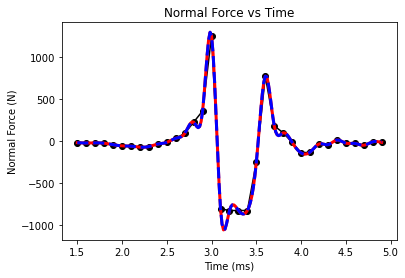

In [17]:
plt.plot(tn,fn,'ko-')
plt.plot(tnq,Fnspline,'r',linewidth=3)
plt.plot(tnq,Fnmyspline,'b--',linewidth=3)
plt.title("Normal Force vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Normal Force (N)")

Compare qualitatively between Python's built-in $CubicSpline()$ function and your $mycubicspline()$ function in terms of what you see in the graph.

In [18]:
#  Write your answer here
